In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 16.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch
import shutil
import os
import random
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import yaml

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="f32xFqYKZCtMrVK7IGmM")
project = rf.workspace("new-workspace-mwunv").project("sesame")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.19, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Sesame-1 in yolov8:: 100%|██████████| 5366/5366 [00:00<00:00, 6488.32it/s]


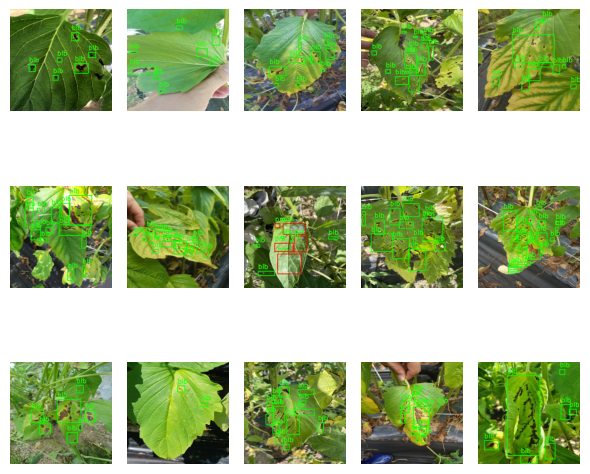

In [7]:
images_folder = "/content/Sesame-1/train/images"
labels_folder = "/content/Sesame-1/train/labels"
images = os.listdir(images_folder)

random.shuffle(images)
rand_images = images[:15]

num_images = len(rand_images)
fig, axes = plt.subplots(3, 5, figsize=(6,6))
axes = axes.flatten()

for i in range(num_images):
    image_path = os.path.join(images_folder, rand_images[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label_path = os.path.join(labels_folder, os.path.splitext(rand_images[i])[0] + '.txt')
    with open(label_path, 'r') as file:
        labels = file.readlines()

    for label in labels:
        class_id, x, y, width, height = map(float, label.strip().split())
        width = int(width * image.shape[0])
        height = int(height * image.shape[1])
        x = int(x * image.shape[0])-int(width/2)
        y = int(y * image.shape[1])-int(height/2)
        if class_id == 1:
          cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)
          cv2.putText(image, 'pm', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        else:
          cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
          cv2.putText(image, 'blb', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO('yolov8m.pt')
model.train(data='/content/Sesame-1/data.yaml', epochs=25, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3,
            project = 'TG_YOLOv8m', name='mitra',
            batch=16, device=device, seed=7)

100%|██████████| 49.7M/49.7M [00:00<00:00, 269MB/s]


Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Sesame-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=TG_YOLOv8m, name=mitra, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=7, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 141MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 289MB/s]


AMP: checks passed ✅


train: Scanning /content/Sesame-1/train/labels... 2141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2141/2141 [00:01<00:00, 1734.66it/s]

train: New cache created: /content/Sesame-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Sesame-1/valid/labels... 268 images, 0 backgrounds, 0 corrupt: 100%|██████████| 268/268 [00:00<00:00, 829.16it/s]

val: New cache created: /content/Sesame-1/valid/labels.cache


Plotting labels to TG_YOLOv8m/mitra/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to TG_YOLOv8m/mitra
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.91G      2.484      2.417      1.843        169        640: 100%|██████████| 134/134 [01:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]

                   all        268       3067      0.604     0.0829     0.0601     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      7.16G      2.393      2.188      1.781        220        640: 100%|██████████| 134/134 [01:12<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        268       3067      0.199      0.203     0.0966     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      7.11G      2.372      2.166      1.774        198        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        268       3067      0.138      0.171     0.0984     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       7.1G      2.339      2.146      1.739        196        640: 100%|██████████| 134/134 [01:10<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        268       3067      0.185      0.237      0.139     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      7.12G      2.318      2.115      1.723        210        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all        268       3067       0.14      0.213       0.12     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      7.11G      2.299      2.089      1.698        236        640: 100%|██████████| 134/134 [01:10<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        268       3067      0.644      0.147      0.115     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       7.1G      2.275      2.039      1.676        237        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all        268       3067      0.205      0.226      0.145     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      7.11G      2.262      2.032      1.671        167        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        268       3067      0.673      0.153      0.146      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      7.12G      2.238      2.019       1.67        213        640: 100%|██████████| 134/134 [01:10<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]

                   all        268       3067      0.281      0.237      0.179     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      7.28G      2.224      1.987       1.66        231        640: 100%|██████████| 134/134 [01:10<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        268       3067      0.171      0.235      0.149     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.16G      2.201      1.968      1.645        196        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]

                   all        268       3067      0.254      0.256      0.174     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      7.12G      2.196      1.946       1.64        163        640: 100%|██████████| 134/134 [01:11<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]

                   all        268       3067       0.24      0.263      0.169     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      7.13G      2.159      1.914      1.608        275        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        268       3067      0.275      0.265      0.188     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      7.15G       2.15      1.908      1.613        237        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        268       3067       0.31      0.194      0.187     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      7.14G      2.149      1.895      1.598        193        640: 100%|██████████| 134/134 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all        268       3067      0.235       0.25       0.18     0.0665


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.12G      2.137      1.935       1.66        136        640: 100%|██████████| 134/134 [01:14<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        268       3067      0.247      0.271      0.192     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      7.12G      2.113        1.9      1.654        139        640: 100%|██████████| 134/134 [01:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]

                   all        268       3067      0.255      0.308      0.211      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.12G      2.097      1.876      1.643        158        640: 100%|██████████| 134/134 [01:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]

                   all        268       3067      0.295       0.26      0.206     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      7.05G       2.09       1.86       1.63        154        640: 100%|██████████| 134/134 [01:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.25it/s]


                   all        268       3067      0.273       0.29      0.202     0.0745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      7.09G      2.073      1.836      1.626        165        640: 100%|██████████| 134/134 [01:09<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.25it/s]

                   all        268       3067      0.327      0.295       0.23      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      7.05G      2.057      1.803      1.616        123        640: 100%|██████████| 134/134 [01:09<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]

                   all        268       3067      0.307      0.293      0.228     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.11G      2.048      1.796      1.616        142        640: 100%|██████████| 134/134 [01:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        268       3067      0.343      0.297      0.234     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.13G      2.029      1.758      1.594        121        640: 100%|██████████| 134/134 [01:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]

                   all        268       3067      0.307      0.288      0.222     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       7.1G      2.008      1.732      1.589        157        640: 100%|██████████| 134/134 [01:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        268       3067      0.269      0.303      0.218     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      7.14G      1.998      1.721      1.582        155        640: 100%|██████████| 134/134 [01:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        268       3067      0.322      0.292      0.243     0.0891



25 epochs completed in 0.559 hours.
Optimizer stripped from TG_YOLOv8m/mitra/weights/last.pt, 52.0MB
Optimizer stripped from TG_YOLOv8m/mitra/weights/best.pt, 52.0MB

Validating TG_YOLOv8m/mitra/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


                   all        268       3067       0.32      0.291      0.242      0.089
 bacterial_leaf_blight        268       2930      0.358      0.435      0.351      0.135
        powdery_mildew        268        137      0.282      0.146      0.134     0.0427
Speed: 0.4ms preprocess, 11.5ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to TG_YOLOv8m/mitra


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1b288860e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import shutil
shutil.make_archive('TG_YOLOv8m', 'zip', '/content/TG_YOLOv8m')


'/content/TG_YOLOv8m.zip'